# Corto 1
Juan Diego Avila 20090


## Parte 1 - Preguntas Teoricas

1. **Defina los componentes de las Cadenas de Markov**
    - *Estados*:
       * Son las posibles situaciones o las condiciones en las que se puede encontrar el sistema en un momento dado. Cada uno de los estados es un caso particular de la situación del sistema.
    - *Probabilidades de transición*:
        * Es la probabilidad de pasar de un estado a otro en un solo paso.
    - *Probabilidades de estado inicial*:
        * Es el conjunto de probabilidades de que el sistema se encuentre en cada uno de los estados en el momento inicial. Son las condiciones iniciales del sistema en forma de una distribución.
2. Defina por lo menos 3 propiedades de las Cadenas de Markov
    - *Homogeneidad temporal*:
        * Esto significa que la probabilidad de transición entre estados no cambia con el tiempo.
    - *Falta de memoria*:
        * Esto significa que la probabilidad de transición entre estados no depende de los estados anteriores y su probabilidad. Esta transición solo depende del estado actual.
    - *Estados Absorbentes*: 
        * Son los estados a los que se puede llegar pero no se puede salir de ellos. No pueden hacer transición a otro estado. La probabilidad de transición a un estado absorbente es 1.
3. ¿Por qué se suele usar procesos de Poisson para simular colas?
    - Porque la distribución de Poisson permite modelar la llegada de eventos aleatoriamente en una tasa constante. 
4. Defina las dos etapas que se suelen emplear para Simulation Optimization
    - *Primera-etapa*:
        * Se busca encontrar las mejores decisiones para un conjunto de parámetros fijos, es decir información conocida previamente. Estas decisiones se llaman decisiones aquí-y-ahora.
    - *Segunda-etapa*:
        * Se busca en tomar las decisiones basadas en aleatoriedad según la información que se obtuvo en la primera etapa. Estas decisiones se llaman decisiones de recurso.


## Parte 2 - Pregunta Práctica

Usted tiene la tarea de evaluar una oportunidad de inversión en un determinado horizonte de inversión. La inversión
involucra factores inciertos, como, la tasa de interés y la volatilidad de los rendimientos. Desea analizar cómo las
variaciones en estos factores influyen en el valor actual neto (VAN) de la inversión.
* Número de simulaciones: 1000
* Horizonte de Inversión: 5 años
* Tasa de descuento: 0,1 (utilizado para calcular los flujos de efectivo descontados)
* Variables del problema:
* Tasa de Interés: Rangos de 0.08 a 0.12
* Volatilidad: Rangos de 0.15 a 0.25

In [1]:
import numpy as np
from scipy.stats import norm
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot as plt

Generar flujos de caja aleatorios: Simule flujos de caja de inversión para cada escenario utilizando una distribución
normal aleatoria con una media de 500000 y una desviación estándar de 100000. Descuente los flujos de caja a
sus valores actuales utilizando la tasa de descuento.

Análisis de Sensibilidad: Realice un análisis de sensibilidad global utilizando índices Sobol para determinar el
impacto de las variaciones en la tasa de interés y la volatilidad en el VAN de la inversión. Puede usar librerías como
SALib etc.

Visualización: visualice los índices de sensibilidad de Sobol para comprender la importancia relativa de cada
variable de entrada para influir en el VPN (Valor Presente Neto).

C:\Users\Juan_Avila\AppData\Local\Temp\ipykernel_14008\3534029810.py:15: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, numero_simulaciones, calc_second_order=False)
c:\Users\Juan_Avila\AppData\Local\Programs\Python\Python310\lib\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


Sobol Indices (first order): [ 0.07851498 -0.03506391]
Sobol Indices (total order): [1.00485125 1.02827398]


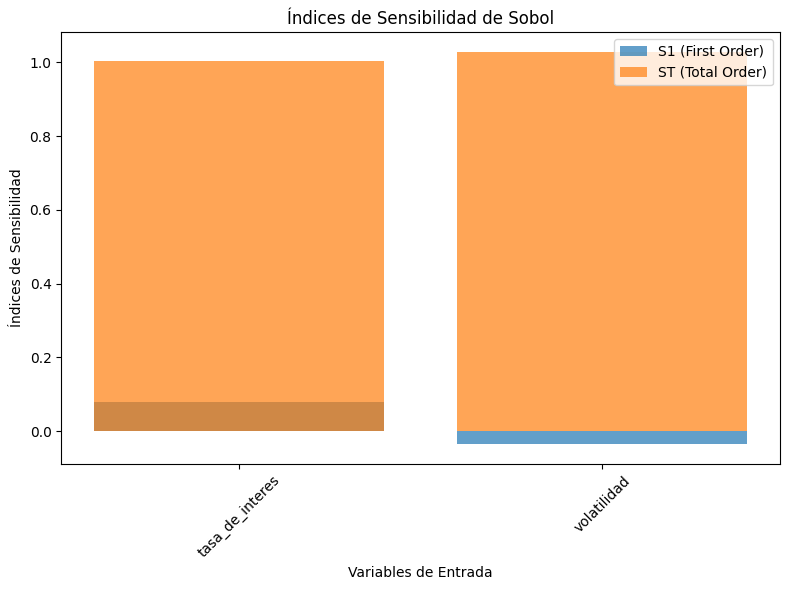

In [24]:
np.random.seed(123)

numero_simulaciones = 1000
horizonte_inversion = 5
tasa_descuento = 0.1
media = 500000
desviacion_estandar = 100000

problem = {
    'num_vars': 2,
    'names': ['tasa_de_interes', 'volatilidad'],
    'bounds': [[0.08, 0.12], [0.15, 0.25]]
}

param_values = saltelli.sample(problem, numero_simulaciones, calc_second_order=False)

cashflows_matrix = np.random.normal(media, desviacion_estandar, (param_values.shape[0], horizonte_inversion))

discount_factors = 1 / (1 + tasa_descuento) ** np.arange(1, horizonte_inversion + 1)
discounted_cashflows = cashflows_matrix * discount_factors
npv_matrix = discounted_cashflows.sum(axis=1)

# Calcula los índices de Sobol de primer y segundo orden
sobol_indices = sobol.analyze(problem, npv_matrix, calc_second_order=False)

print("Sobol Indices (first order):", sobol_indices['S1'])
print("Sobol Indices (total order):", sobol_indices['ST'])

# Obtén los índices de primer y total orden de sensibilidad
s1_indices = sobol_indices['S1']
st_indices = sobol_indices['ST']

# Nombres de las variables de entrada
variable_names = problem['names']

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar los índices de sensibilidad
ax.bar(variable_names, s1_indices, label='S1 (First Order)', alpha=0.7)
ax.bar(variable_names, st_indices, label='ST (Total Order)', alpha=0.7)

# Agregar etiquetas y leyendas
ax.set_xlabel('Variables de Entrada')
ax.set_ylabel('Índices de Sensibilidad')
ax.set_title('Índices de Sensibilidad de Sobol')
ax.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Se utilizo chat-gpt y el orden de prompts fue:

* Tengo los siguientes parametros con los que deseo hacer un analisis de sensibilidad global "
    - Número de simulaciones: 1000
    - Horizonte de Inversión: 5 años
    - Tasa de descuento: 0,1 (utilizado para calcular los flujos de efectivo descontados)
    - Variables del problema:
    - Tasa de Interés: Rangos de 0.08 a 0.12
    - Volatilidad: Rangos de 0.15 a 0.25" Necesito simular flujos de caja de inversion para cada escenario usando la distribucion normal con media de 500000 y una desviacion estandar de 100000. Necesito descontar los flujos de caja a sus valores actuales usando la tasa de descuento en python
* Teniendo eso necesito hacer un analisis de sensibilidad global usando indices de sobol para determinar el impacto de las variaciones en la tasa de interes y la volatilidad en VAN de la inversion utilizando la libreria SALib
* Hubo un error con los parametros normalizados por lo que se tuvo que hacer un cambio en el codigo para que funcionara.
* Con los resultados de lo que me proporcionaste visualice los índices de sensibilidad de Sobol para comprender la importancia relativa de cada
variable de entrada para influir en el VPN (Valor Presente Neto).

### Preguntas
1. ¿Qué tanto influye cada variable en el VPN?
    - Ambas variables influyen en el VPN. La tasa de interes tiene una influencia positiva en el VPN, mientras que la volatilidad tiene una influencia negativa en el VPN.
2. ¿Qué variable influye más? ¿Por qué cree que es esto?
    - La variable de tasa de interes tiene una influencia positiva en el VPN, por lo que puede ser una variable que influye mas en el VPN. Esto puede ser porque a mayor tasa de interes, mayor es el valor del VPN.
3. ¿Hay una diferencia significativa en la influencia de cada variable? ¿Por qué?
    - Si ya que como se puede observar, la tasa de interes tiene un S1 positivo mientras que la volatilidad tiene negativo. Esto puede indicar que la tasa de interes tiene mas influencia directa, pero a pesar de esto las dos variables si tienen bastante influencia en el VPN porque tienen un ST bastante parecido.
4. Si tuviera que hacer mejoras al análisis ¿qué podría hacer? (Puede usar recursos de internet para esta parte, sí puede usar ChatGPT de nuevo acá)
    - Aumentar el numero de simulaciones para poder obtener resultados mas precisos.
    - Explorar las interacciones de segundo orden entre las variables para entender mejor las interacciones complejas entre las variables.
    - Se puede hacer un analisis de sensibilidad basado en metamodelos lo que ayudaría a reducir la cantidad de simulaciones necesarias para obtener resultados mas precisos.